# Evaluation of tabu search implementation

In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


In [2]:
def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x):
    return np.log(x, out=np.copy(x), where=x>0)



funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 1)
funset.add(np.sin, 1)
funset.add(np.cos, 1)

params1d = tengp.Parameters(2, 1, 1, 100, funset)
params2d = tengp.Parameters(3, 1, 1, 100, funset)

#functions = [f'nguyenf{i}' for i in range(1,9)]
functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1])]

In [3]:
trials = 100

# Probabilistic mutation

In [4]:
%%time

random.seed(0)

pr_results = []

for function in functions:
    trial_results = []
    for trial in range(trials):
        print(trial, end=',')
        X, y = get_data(function[0], *function[2])
        X = np.c_[np.ones(len(X)), X]
        population = tengp.simple_es(X, y, mean_squared_error, function[1], mutation='probabilistic')
        trial_results.append(population[0].fitness)
    pr_results.append(trial_results)
    

0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in cos
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in sin
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 23min 45s, sys: 1.19 s, total: 23min 47s
Wall time: 24min 9s


# Single mutation, without tabu memory

In [5]:
%%time

random.seed(0)

results = []

for function in functions:
    print(function[0])
    trial_results = []
    for trial in range(trials):
        print(trial, end=',')
        X, y = get_data(function[0], *function[2])
        X = np.c_[np.ones(len(X)), X]
        population = tengp.simple_es(X, y, mean_squared_error, function[1], mutation='single')
        trial_results.append(population[0].fitness)
    results.append(trial_results)
    
    

nguyenf4
0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in sin
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in cos
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: Ru

1,2,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in subtract
  current_node.value = current_node.fun(*values)


3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,nguyenf7
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,nguyenf10
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,CPU times: user 18min 32s, sys: 3.02 s, total: 18min 35s
Wall time: 20min 23s


# Single mutation, with tabu memory

In [16]:
%%time

random.seed(0)

ts_results = []

for function in functions:
    print(function[0])
    trial_results = []
    for trial in range(trials):
        print(trial, end=',')
        X, y = get_data(function[0], *function[2])
        X = np.c_[np.ones(len(X)), X]
        population = tengp.search.tabu_es(X, y, mean_squared_error, function[1], mutation='single', memory_size=1000)
        trial_results.append(population[0].fitness)
    ts_results.append(trial_results)
    

nguyenf4
0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in multiply
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in sin
  current_node.value = current_node.fun(*values)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:116: RuntimeWarning: invalid value encountered in cos
  current_node.value = current_node.fun(*values)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


KeyboardInterrupt: 

In [15]:
ts_results

[]

# Results

Simple statistics:

In [14]:
print(f'probabilistic version, mean: {np.mean(pr_results)}, median: {np.median(pr_results)}')
print(f'basic version, mean: {np.mean(results)}, median: {np.median(results)}')
print(f'ts version,    mean: {np.mean(ts_results)}, median: {np.median(ts_results)}')

probabilistic version, mean: 0.08245087019694165, median: 0.008129860161568823
basic version, mean: 0.039830910463764614, median: 0.005614787096076497
ts version,    mean: nan, median: nan


/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplots of results over all functions:

Text(0.5,1,'tabe search single mutation')

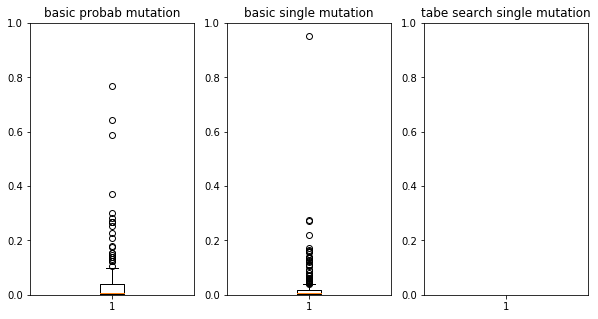

In [10]:
_, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].boxplot(np.array(pr_results).flatten())
axs[1].boxplot(np.array(results).flatten())
axs[2].boxplot(np.array(ts_results).flatten());
axs[0].set_ylim(0,1); axs[0].set_title('basic probab mutation')
axs[1].set_ylim(0,1); axs[1].set_title('basic single mutation')
axs[2].set_ylim(0,1); axs[2].set_title('tabe search single mutation')

Distributions of results over all functions

/home/jarino/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


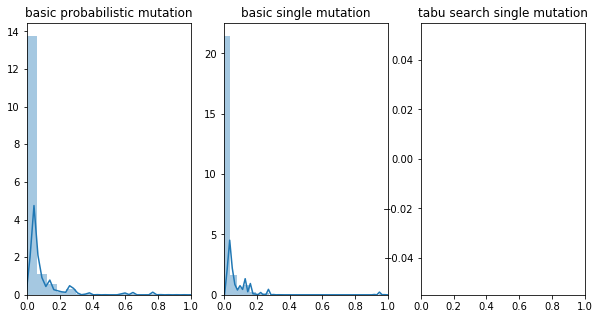

In [11]:
_, axs = plt.subplots(1, 3, figsize=(10, 5))

sns.distplot(np.array(pr_results).flatten(), ax=axs[0]); axs[0].set_xlim(0,1); axs[0].set_title('basic probabilistic mutation');
sns.distplot(np.array(results).flatten(), ax=axs[1]); axs[1].set_xlim(0,1); axs[1].set_title('basic single mutation');
sns.distplot(np.array(ts_results).flatten(), ax=axs[2]); axs[2].set_xlim(0,1); axs[2].set_title('tabu search single mutation');

Hit count

In [12]:
print('Hit count for basic probabilistic mutation {}'.format((np.array(pr_results).flatten() <= 0.0001).sum()))
print('Hit count for basic single mutation {}'.format((np.array(results).flatten() <= 0.0001).sum()))
print('Hit count for ts single mutation {}'.format((np.array(ts_results).flatten() <= 0.0001).sum()))

Hit count for basic probabilistic mutation 7
Hit count for basic single mutation 21
Hit count for ts single mutation 0


In [13]:
print('Hit count for basic probabilistic mutation {}'.format((np.array(pr_results).flatten() == 0).sum()))
print('Hit count for basic single mutation {}'.format((np.array(results).flatten() == 0).sum()))
print('Hit count for ts single mutation {}'.format((np.array(ts_results).flatten() == 0).sum()))

Hit count for basic probabilistic mutation 4
Hit count for basic single mutation 4
Hit count for ts single mutation 0
